In [79]:
import pandas as pd
tags = pd.read_csv('C:/Users/Jacob Tran/OneDrive - LA TROBE UNIVERSITY/DSE200x/Week-4-Pandas/movielens/tags.csv', sep=',')
ratings = pd.read_csv('C:/Users/Jacob Tran/OneDrive - LA TROBE UNIVERSITY/DSE200x/Week-4-Pandas/movielens/ratings.csv', sep=',')
movies = pd.read_csv('C:/Users/Jacob Tran/OneDrive - LA TROBE UNIVERSITY/DSE200x/Week-4-Pandas/movielens/movies.csv', sep=',')

In [80]:
%matplotlib inline

In [81]:
tags.isnull().any()


userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

In [69]:
tags = tags.dropna()

In [70]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [71]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [73]:
tags.head()

,userId,movieId,tag
0,18,4141,Mark Waters
1,65,208,dark hero
2,65,353,dark hero
3,65,521,noir thriller
4,65,592,dark hero


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022A0198E828>]], dtype=object)

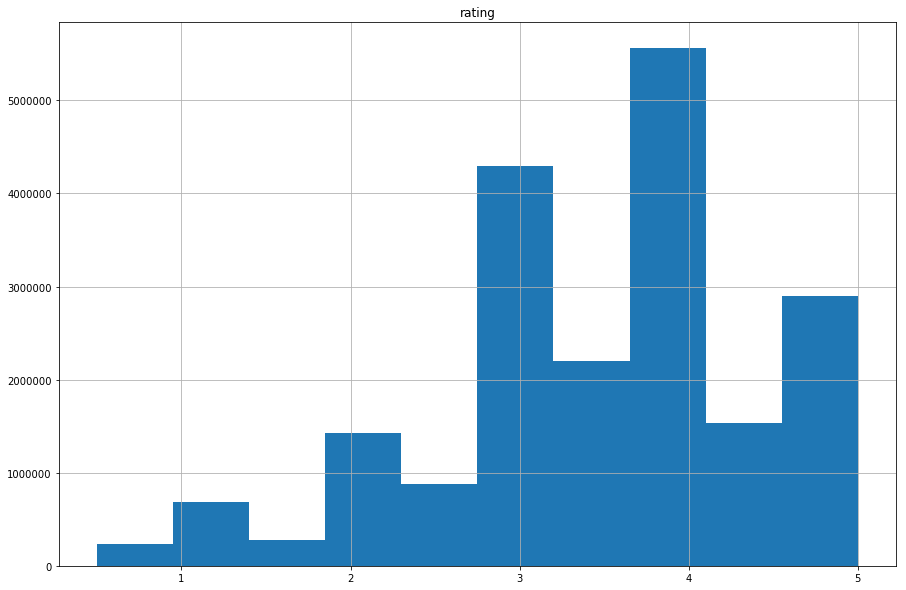

In [74]:
ratings.hist(column='rating', figsize=(15,10))

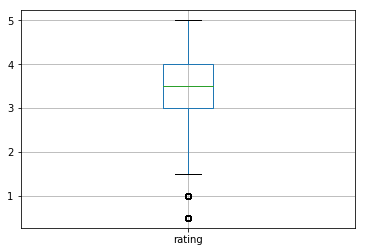

In [75]:
ratings.boxplot(column='rating', figsize=(15,10))

**Merging data**

In [82]:
t=movies.merge(tags, on='movieId', how='inner')
t.head()

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1644,Watched,1417736680
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,computer animation,1183903155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Disney animated feature,1183933307
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,Pixar animation,1183934770
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1741,TÃ©a Leoni does not star in this movie,1245093573


In [83]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

,movieId,rating,timestamp
0,1,3.921240,1.052654e+09
1,2,3.211977,1.037616e+09
2,3,3.151040,9.596480e+08
3,4,2.861393,9.242144e+08
4,5,3.064592,9.620161e+08


In [84]:
tags['parsed_time']=pd.to_datetime(tags['timestamp'], unit='s')
tags.head()

,userId,movieId,tag,timestamp,parsed_time
0,18,4141,Mark Waters,1240597180,2009-04-24 18:19:40
1,65,208,dark hero,1368150078,2013-05-10 01:41:18
2,65,353,dark hero,1368150079,2013-05-10 01:41:19
3,65,521,noir thriller,1368149983,2013-05-10 01:39:43
4,65,592,dark hero,1368150078,2013-05-10 01:41:18


In [85]:
average_ratings = ratings[['movieId', 'rating', 'timestamp']].groupby('movieId', as_index= False).mean()
average_ratings.head()

,movieId,rating,timestamp
0,1,3.921240,1.052654e+09
1,2,3.211977,1.037616e+09
2,3,3.151040,9.596480e+08
3,4,2.861393,9.242144e+08
4,5,3.064592,9.620161e+08


In [86]:
average_ratings['year']=pd.to_datetime(average_ratings['timestamp'], unit='s')

In [87]:
joined = movies.merge(average_ratings, on='movieId', how='inner')
joined.head()

,movieId,title,genres,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,1.052654e+09,2003-05-11 11:54:58.862984
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,1.037616e+09,2002-11-18 10:44:55.644158
2,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,9.596480e+08,2000-05-30 00:53:39.163329
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,9.242144e+08,1999-04-15 22:13:31.009797
4,5,Father of the Bride Part II (1995),Comedy,3.064592,9.620161e+08,2000-06-26 10:41:25.413371


In [61]:
year_average = joined[['year', 'rating']].groupby('year', as_index=False).mean()
year_average.head()

KeyError: "['year'] not in index"

In [51]:
year_average[-20:].plot(x='year', y='rating', figsize(15,10), grid=True)

SyntaxError: positional argument follows keyword argument (<ipython-input-51-b9d3447a8fdb>, line 1)